# 导入模块

In [1]:
import csv

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

# get_data(Lanes)函数，从csv文件中读取数据，存放在list_y中

In [3]:
def get_data(Lanes):
    list_y = []
    for train_time in range(1, 21):
        with open('L_%s_train_%s.csv'%(str(Lanes), str(train_time)), newline='', encoding='utf-8') as csvfile:
            csv_reader = csv.reader(csvfile, quotechar='|')
            for row_data in csv_reader:
                row_data = map(float, row_data)
                list_y.append(list(row_data))
    return list_y
    # print(list_y)
# get_data(4)

# 数据可视化，并做简单的初步处理

In [4]:
def add(a, b):
    return a + b

In [5]:
def plot_data(Lanes):
    x = list(range(Lanes, Lanes+11))
    list_avg_min = []
    plt.figure(figsize=(12,10), dpi=80)
    for train_time, y in enumerate(get_data(Lanes), start=1):
        plt.plot(x, y, 'o-', linewidth=1.0, label="train_%s"%(str(train_time)))
        list_avg_min.append(Lanes + y.index(min(y)))
    plt.xticks(np.linspace(Lanes, Lanes+10, 11, endpoint=True), fontsize=18)
    plt.yticks(np.linspace(600, 1050, 10, endpoint=True), fontsize=18)
    plt.xlabel('Booths', fontsize=18)
    plt.ylabel('Costs', fontsize=18)
    plt.title('Booths/Costs Diagram', fontsize=18)
    plt.legend(loc='upper right')
    plt.text(Lanes+2, 950, r'the optimal B(booths) with L(lanes)=%d is %d'%(Lanes, reduce(add, list_avg_min)/len(list_avg_min)), fontsize=18)
    plt.show()
    print('the optimal B(booths) with L(lanes)=%d is %d \n'%(Lanes, reduce(add, list_avg_min)/len(list_avg_min)))

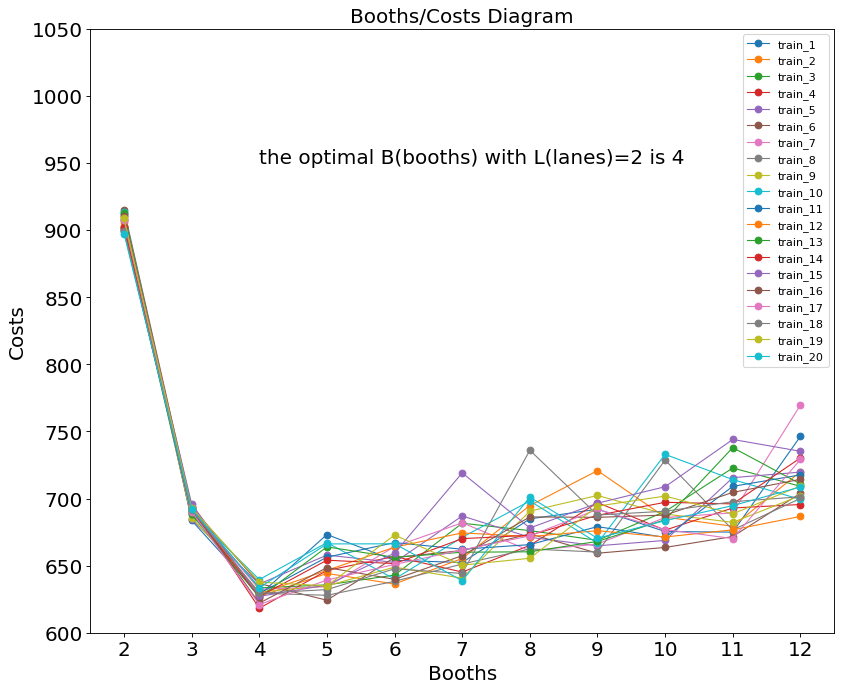

the optimal B(booths) with L(lanes)=2 is 4 



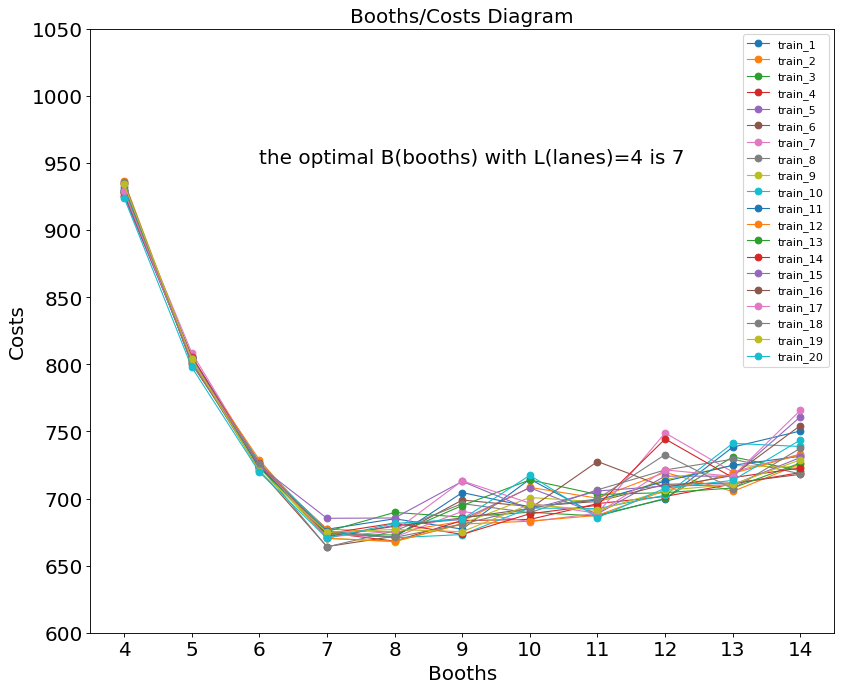

the optimal B(booths) with L(lanes)=4 is 7 



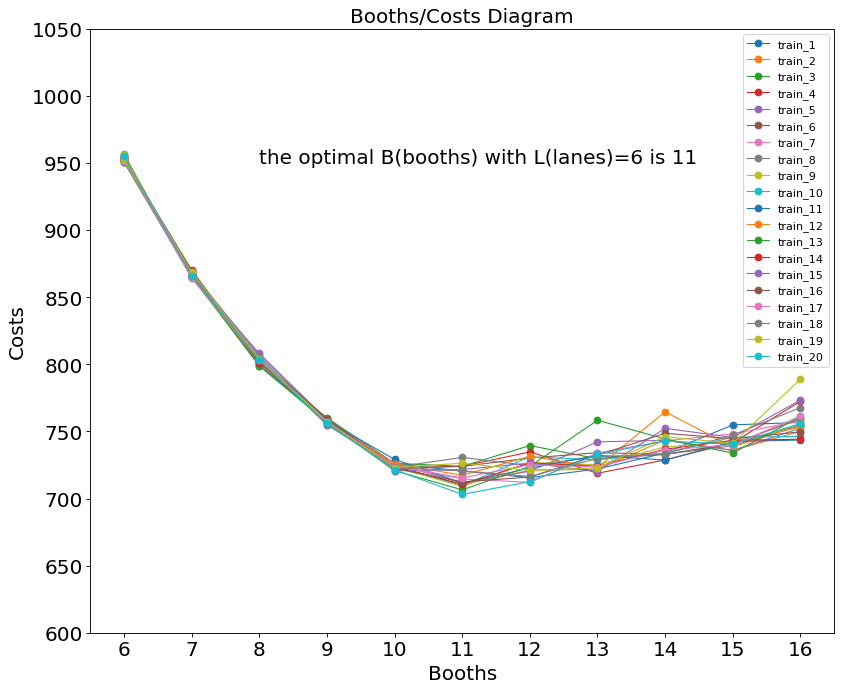

the optimal B(booths) with L(lanes)=6 is 11 



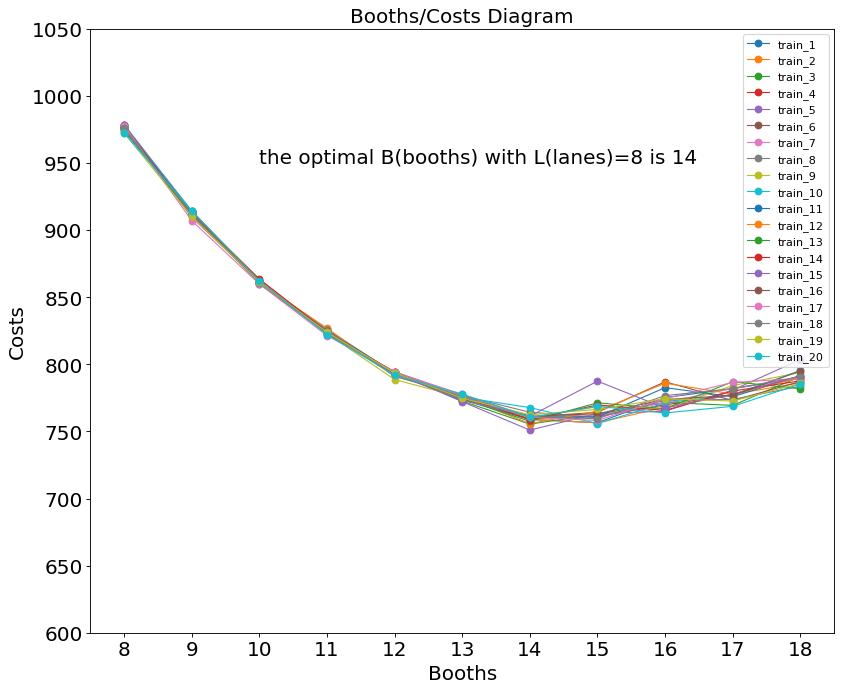

the optimal B(booths) with L(lanes)=8 is 14 



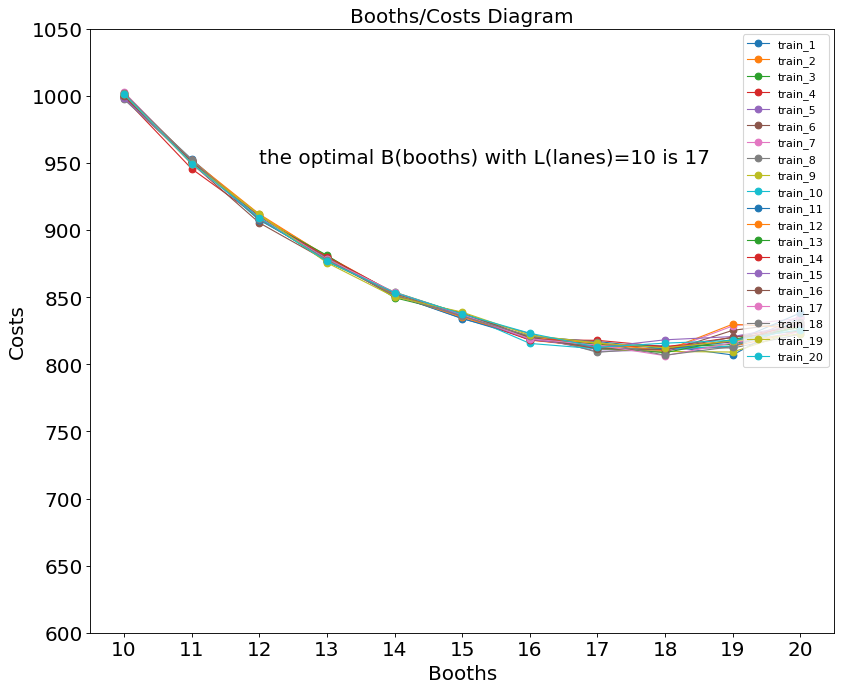

the optimal B(booths) with L(lanes)=10 is 17 



In [6]:
for lanes in range(2, 12, 2):
    plot_data(lanes)

In [7]:
def get_an_data(Lanes):
    list_y = []
    for train_time in range(1, 11):
        with open('L_%s_an_train_%s.csv'%(str(Lanes), str(train_time)), newline='', encoding='utf-8') as csvfile:
            csv_reader = csv.reader(csvfile, quotechar='|')
            for row_data in csv_reader:
                row_data = map(float, row_data)
                list_y.append(list(row_data))
    return list_y
    #print(list_y)

In [8]:
print(get_an_data(6))

[[962.16, 981.1, 990.77, 834.26, 845.92, 767.39, 786.94, 754.8, 759.78, 760.29, 772.65], [964.54, 974.29, 995.47, 833.47, 847.17, 775.98, 778.41, 751.34, 764.18, 758.0, 773.46], [960.11, 983.89, 988.48, 836.63, 849.51, 768.06, 784.99, 754.71, 767.91, 762.31, 774.99], [969.28, 976.65, 985.39, 828.56, 849.99, 771.44, 787.01, 755.64, 766.16, 757.54, 774.93], [962.81, 976.26, 992.96, 841.99, 845.84, 772.5, 786.17, 755.57, 757.79, 764.93, 763.06], [968.78, 985.62, 995.47, 843.85, 856.61, 779.75, 792.99, 765.53, 775.27, 774.43, 783.82], [971.4, 989.68, 997.04, 839.71, 845.72, 776.08, 790.03, 762.55, 779.52, 769.36, 781.54], [972.18, 979.39, 1000.6, 842.69, 858.03, 775.51, 787.41, 767.52, 773.21, 773.92, 778.91], [969.66, 980.69, 994.73, 840.54, 858.41, 783.35, 788.63, 757.09, 776.52, 765.9, 779.08], [972.47, 980.42, 993.23, 837.07, 854.41, 774.24, 788.84, 763.7, 778.74, 767.96, 782.86]]


In [9]:
def get_ae_data(Lanes):
    list_y = []
    for train_time in range(1, 11):
        with open('L_%s_ae_train_%s.csv'%(str(Lanes), str(train_time)), newline='', encoding='utf-8') as csvfile:
            csv_reader = csv.reader(csvfile, quotechar='|')
            for row_data in csv_reader:
                row_data = map(float, row_data)
                list_y.append(list(row_data))
    return list_y
    #print(list_y)

In [10]:
def plot_all_data(Lanes):
    list_avg_Bmin = []
    list_avg_Cmin = []
    text = ['', 'apporach to begin', 'apporach to end']
    
    x = list(range(Lanes, Lanes+11))
    plt.figure(figsize=(16,10), dpi=80)
    
    for y in get_data(Lanes)[:10]:
        plt.plot(x, y, 'bo-', linewidth=1.0)
        list_avg_Bmin.append(Lanes + y.index(min(y)))
        list_avg_Cmin.append(min(y))
    for y in get_an_data(Lanes):
        plt.plot(x, y, 'g^-', linewidth=1.0)
        list_avg_Bmin.append(Lanes + y.index(min(y)))
        list_avg_Cmin.append(min(y))
    for y in get_ae_data(Lanes):
        plt.plot(x, y, 'rv-', linewidth=1.0)
        list_avg_Bmin.append(Lanes + y.index(min(y)))
        list_avg_Cmin.append(min(y))
        
    plt.xticks(np.linspace(Lanes, Lanes+10, 11, endpoint=True), fontsize=18)
    plt.yticks(np.linspace(600, 1050, 10, endpoint=True), fontsize=18)
    plt.xlabel('Booths', fontsize=18)
    plt.ylabel('Costs', fontsize=18)
    plt.title('Booths/Costs Diagram', fontsize=18)
    # plt.legend(loc='upper right')
    
    for i in range(1, 4):
        plt.text(Lanes+3, 975+i*14, 'the optimal B(booths ' + text[i-1] + ') with L(lanes)=%d is %d' \
                 %(Lanes, sum(list_avg_Bmin[(i-1)*10:i*10])/(len(list_avg_Bmin[(i-1)*10:i*10]))), fontsize=14)
    for i in range(1, 4):
        plt.text(Lanes+3, 925+i*14, 'the mean minimal Cost of L(Lanes)=%d and Booths ' %(Lanes)+ text[i-1] + ' is %f' \
                 %(sum(list_avg_Cmin[(i-1)*10:i*10])/(len(list_avg_Bmin[(i-1)*10:i*10]))), fontsize=14)
    plt.show()
    # print('the optimal B(booths) with L(lanes)=%d is %d \n'%(Lanes, reduce(add, list_avg_min)/len(list_avg_min)))

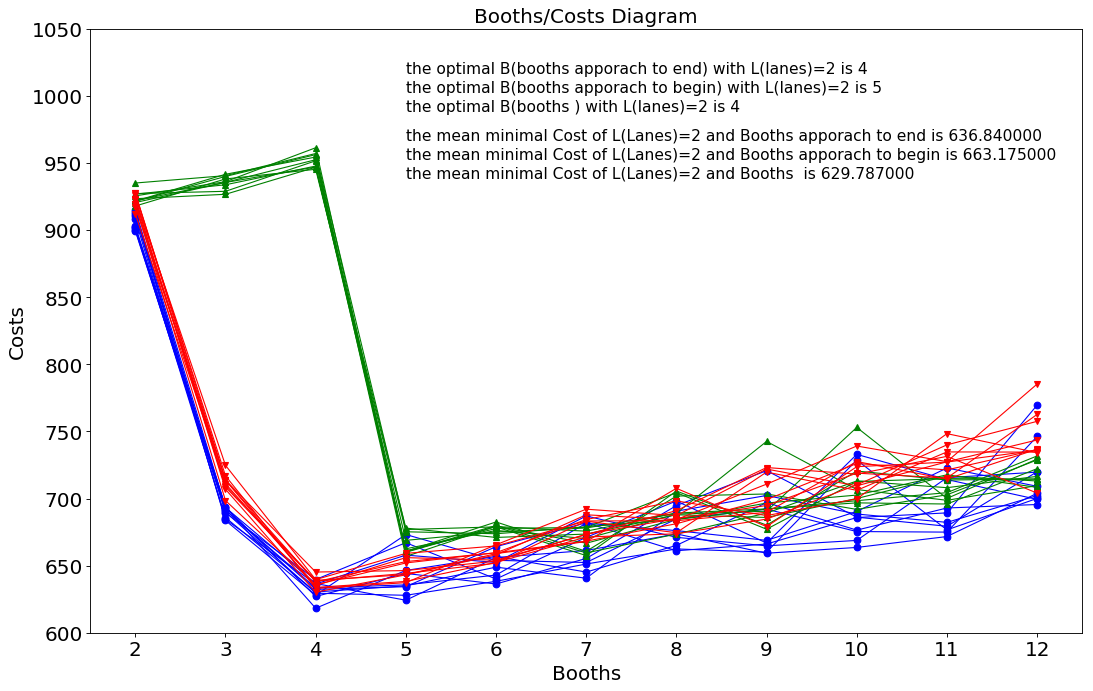

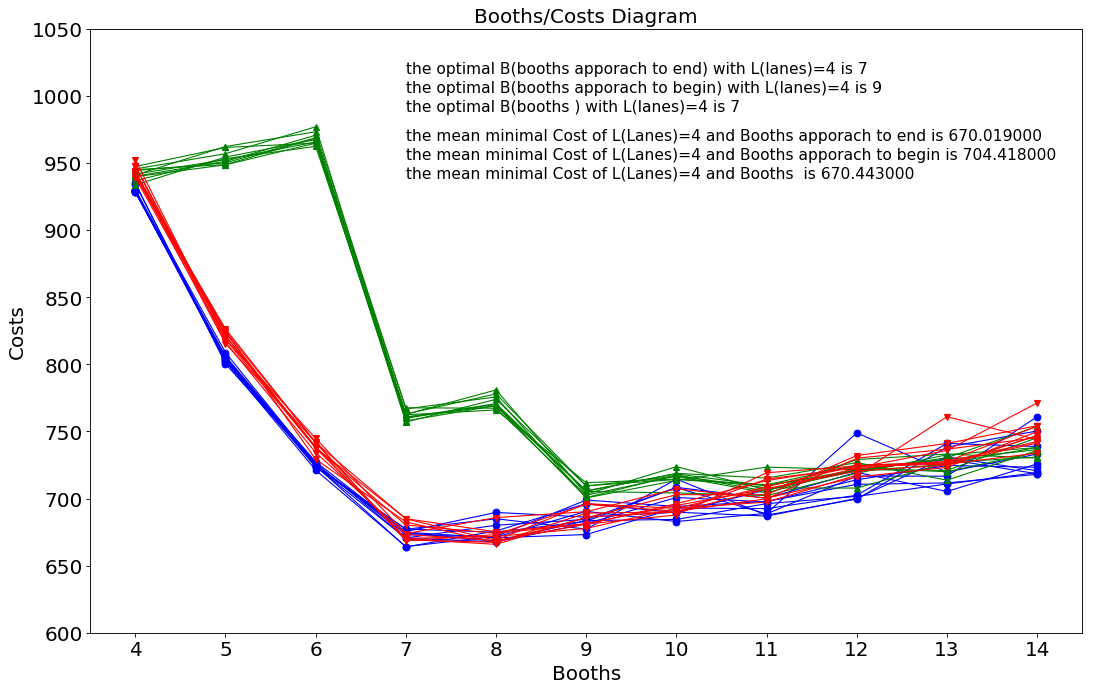

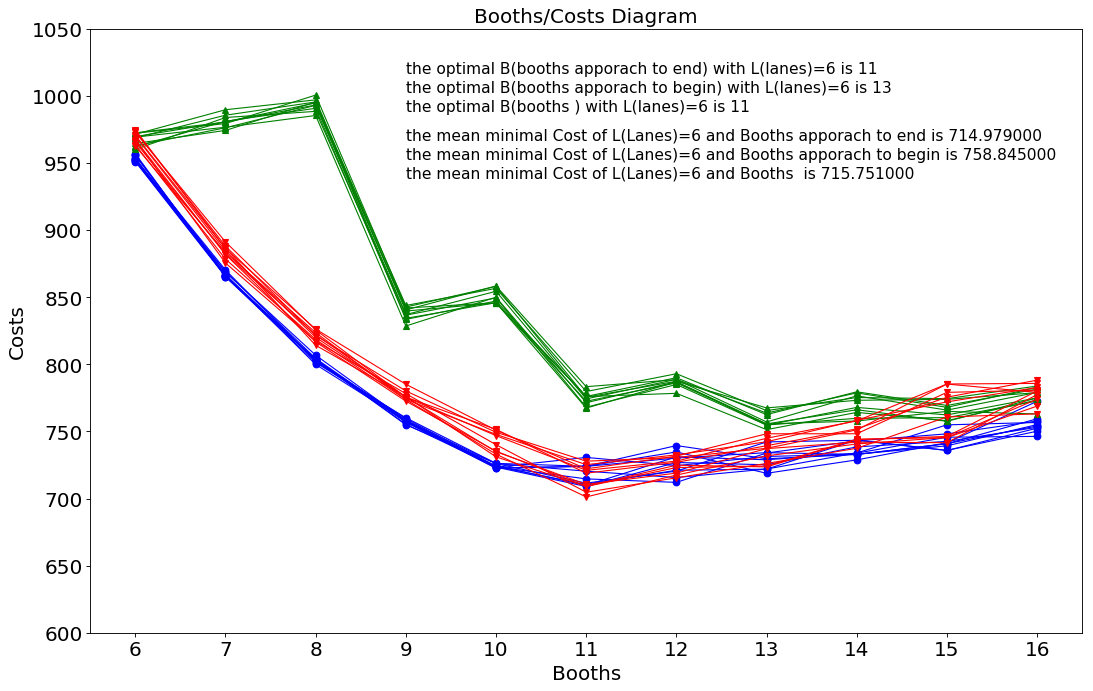

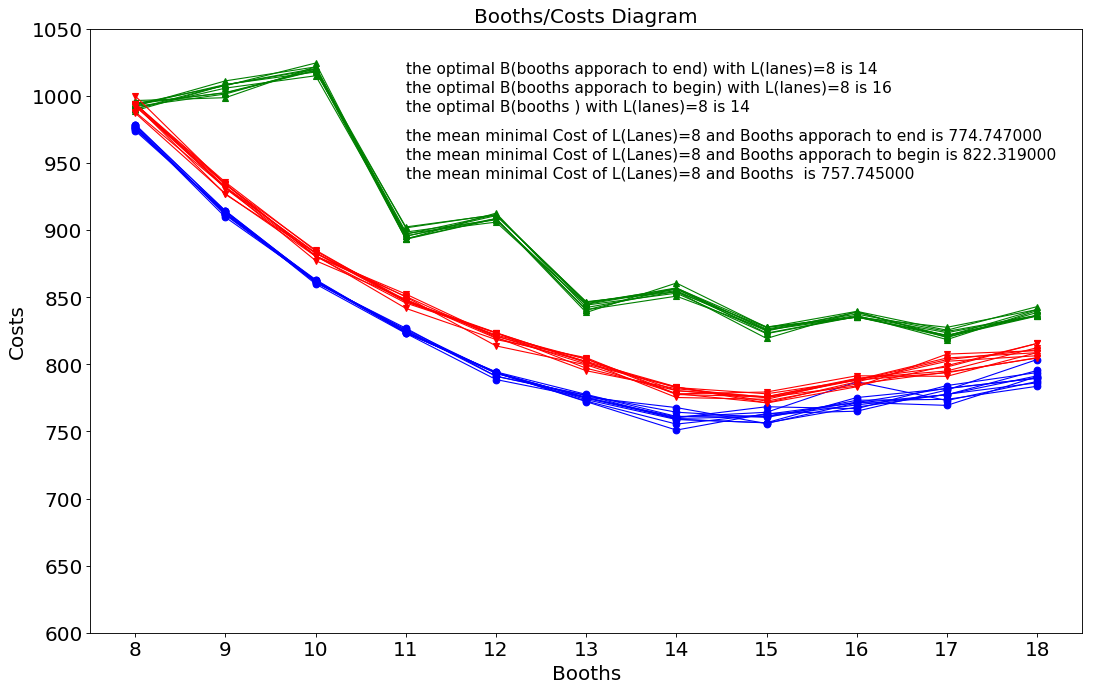

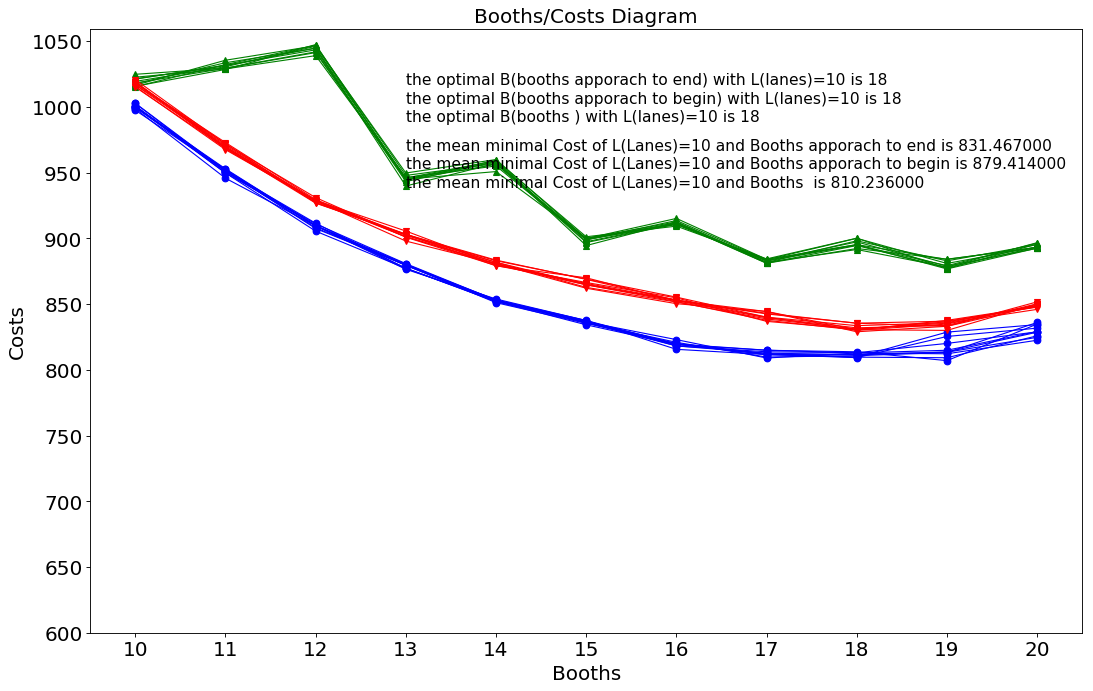

In [11]:
for lanes in range(2, 12, 2):
    plot_all_data(lanes)